In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from numpy.linalg import svd

In [2]:
# -----------------------------
# Load Data
# -----------------------------
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Standardize
X_std = StandardScaler().fit_transform(X)

In [4]:
# -----------------------------
# PCA - Covariance Eigen Decomposition
# -----------------------------
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Cumulative Variance Explained: [ 72.96244541  95.8132072   99.48212909 100.        ]


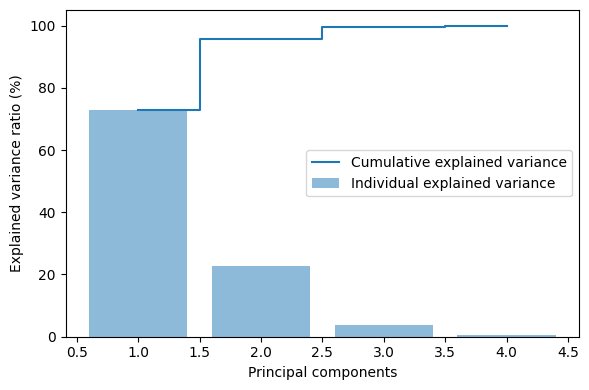

In [5]:
# Explained variance
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Eigenvalues:", eig_vals)
print("Cumulative Variance Explained:", cum_var_exp)

plt.figure(figsize=(6, 4))
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# PCA (sklearn) - 3D Plot
X_pca = PCA(n_components=3).fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = y

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color='target', title="PCA (First 3 Components)")
plt.show()

In [9]:

# -----------------------------
# LDA
# -----------------------------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y

fig = px.scatter(df_lda, x='LD1', y='LD2', color='target',
                 title="LDA Projection")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# -----------------------------
# SVD
# -----------------------------
U, S, VT = svd(X_std)

explained_variance = (S**2) / np.sum(S**2)
print("Explained Variance by SVD Components:", explained_variance)

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(S)+1), explained_variance, alpha=0.7)
plt.xlabel('SVD Components')
plt.ylabel('Explained Variance Ratio')
plt.title('SVD Explained Variance')
plt.tight_layout()
plt.show()